In [35]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [56]:
df = pd.read_csv(r"C:\Users\Матвей\Downloads\bestsellers with categories.csv")

In [57]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [58]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [6]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [59]:
df = df.rename(columns={'Name':'name','Author':'author',
           'User Rating':'user_rating',
           'Reviews':'reviews',
           'Price':'price',
           'Year':'year',
           'Genre':'genre'})

In [8]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [60]:
col_name_without_numeric_data = list(df.select_dtypes(exclude=('int', 'float')).columns)
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')
# поиск ошибок в написании

Before name: 351 After name: 350
Before author: 248 After author: 248
Before genre: 2 After genre: 2


In [61]:
df.name = df.name.str.title().str.strip()

In [62]:
col_name_without_numeric_data = list(df.select_dtypes(exclude=('int', 'float')).columns)
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before name: 350 After name: 350
Before author: 248 After author: 248
Before genre: 2 After genre: 2


In [12]:
authors = df.author.sort_values().unique()
authors
# выводим список уникальных имен авторов, чтобы проверить нет ли среди них одних и тех же имен
# написанных по разному,заодно исправим другие ошибки в написании  имен

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [63]:
df = df.replace('Delegates of the Constitutional\x85','Delegates of the Constitutional')
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('The Staff of The Late Show with\x85', 'The Staff of The Late Show with')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [14]:
df.shape

(550, 7)

In [15]:
df.name.nunique()
# в фиче name недолжно быть повторов, но мы видим, что уникальных названий всего 350

350

In [64]:
df = df.drop_duplicates(['name'])
# удаляем повторяющиеся названия

In [20]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<AxesSubplot:>

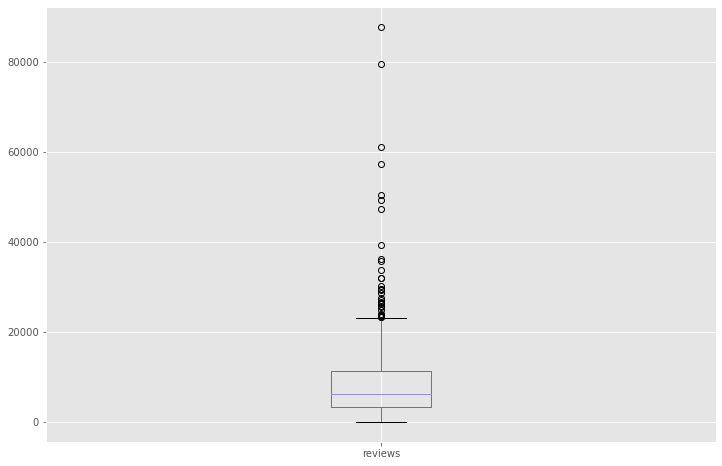

In [27]:
df.boxplot(column=['reviews'])
# большая часть количества рецензий находится в переделах от 2000 до 40000

In [22]:
df.corr()
# здесь мы можем увидеть, что числовые значения не имеют сильной корреляции между ними

,user_rating,reviews,price,year
user_rating,1.000000,-0.059336,-0.033613,0.219989
reviews,-0.059336,1.000000,-0.019487,0.222807
price,-0.033613,-0.019487,1.000000,-0.132870
year,0.219989,0.222807,-0.132870,1.000000


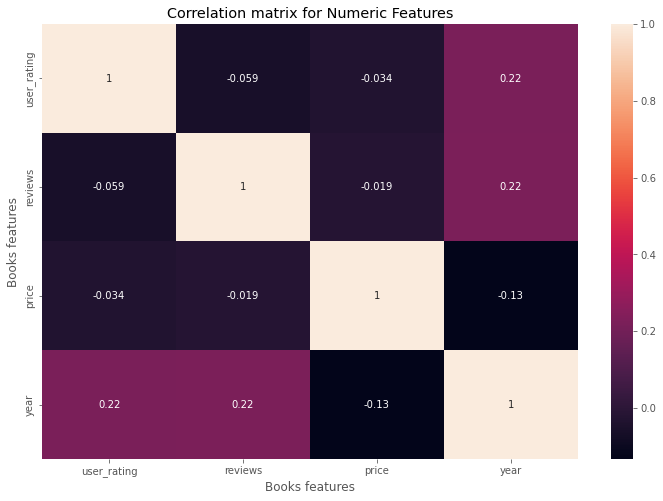

In [30]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Books features")

plt.ylabel("Books features")

plt.show()

In [31]:
# теперь переведем условно строковые данные в числовые, чтобы посмотреть, как они коррелируют
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,author,user_rating,reviews,price,year,genre
0,0,112,4.7,17350,8,2016,1
1,1,217,4.6,2052,22,2011,0
2,2,132,4.7,18979,15,2018,1
3,3,95,4.7,21424,6,2017,0
4,4,172,4.8,7665,12,2019,1
...,...,...,...,...,...,...,...
538,345,137,4.5,10760,15,2012,0
539,346,94,4.2,1302,11,2010,1
540,347,186,4.8,21625,9,2013,0
545,348,118,4.9,9413,8,2019,0


In [ ]:
# Думаю, что должна быть сильная корреляция между автором и рейтингом
# также между автором и ценой, ценой и названием

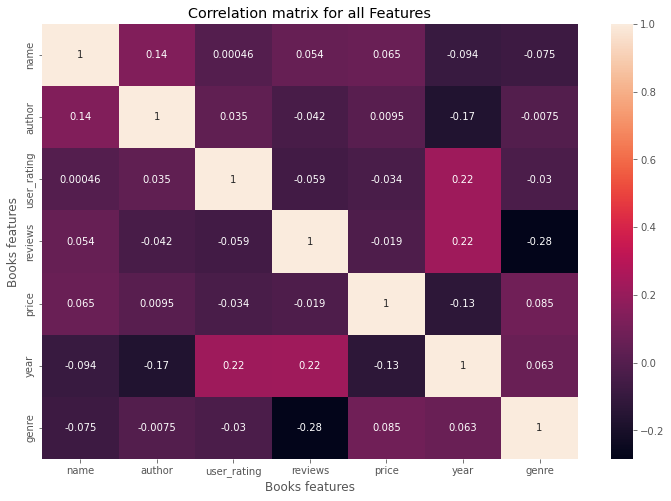

In [32]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for all Features")

plt.xlabel("Books features")

plt.ylabel("Books features")

plt.show()

In [ ]:
# как видно из матрирцы, мои теории были не верными,
#в данных, в принципе отстутвует хоть сколько-нибудь высокая корреляция

In [33]:
# теперь посмтроим визуализацию исходного датафрейма

In [67]:
top_10_authors = df.groupby('author')[['user_rating']].mean()\
                                                                 .sort_values('user_rating', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()
top_10_authors

,author,user_rating
0,Nathan W. Pyle,4.9
1,Bill Martin Jr.,4.9
2,Jill Twiss,4.9
3,Rush Limbaugh,4.9
4,Pete Souza,4.9
5,Sarah Young,4.9
6,Lin-Manuel Miranda,4.9
7,Patrick Thorpe,4.9
8,Dav Pilkey,4.9
9,Alice Schertle,4.9


In [72]:

top_10_authors_table= make_subplots(rows=1, cols=1, subplot_titles=("")) 


# Назначаем параметры таблицы
top_10_authors_table.add_trace(go.Table(columnorder = [1,2],
                         columnwidth = [70,50],
                         header=dict(values=top_10_authors.columns, 
                                     line_color='black',
                                     fill_color='Salmon',
                                     height=30),
                         cells=dict(values=[top_10_authors['author'],
                                    top_10_authors['user_rating']], 
                                    line_color='black',
                                    fill_color='White')))


In [86]:
count_of_books_by_genre = df.groupby('genre')[['name']].count()\
                                                                 .sort_values('name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()
count_of_books_by_genre = count_of_books_by_genre.rename({'name':'count'},axis=1)
count_of_books_by_genre

,genre,count
0,Non Fiction,190
1,Fiction,160


Text(0.5, 1.0, 'Genres')

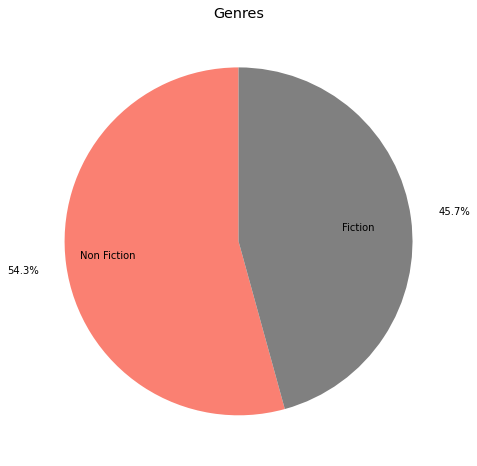

In [101]:
labels = count_of_books_by_genre['genre']
sizes = count_of_books_by_genre['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',
       colors=['Salmon','Gray'],
      pctdistance=1.25, 
       labeldistance=.6,
      startangle= 90)
plt.title('Genres')

In [211]:
fiction_books = df[df.isin(['Fiction']).any(axis= 1 )]
non_fiction_books = df[df.isin(['Non Fiction']).any(axis= 1 )]

fiction_books = fiction_books.groupby('author')[['reviews']].mean()\
.sort_values('reviews', ascending=False).reset_index().head(10)

non_fiction_books = non_fiction_books.groupby('author')[['reviews']].mean()\
.sort_values('reviews', ascending=False).reset_index().head(10)
# так как названия слишком длинные сделаем визуализацию с числовыми данными,
# а для удобства сопоставления сохрнаим условно строковые данные

In [155]:
# fiction_books_numeric = df_numerized[df_numerized.isin([1]).any(axis= 1 )]
# non_fiction_books_numeric = df_numerized[df_numerized.isin([0]).any(axis= 1 )]

# fiction_books_numeric = fiction_books_numeric.groupby('name')[['reviews']].mean().reset_index().head(10)
# non_fiction_books_numeric = non_fiction_books_numeric.groupby('name')[['reviews']].mean().reset_index().head(10)
# fiction_books_numeric

,name,reviews
0,0,17350.0
1,1,2052.0
2,2,18979.0
3,4,7665.0
4,8,5983.0
5,10,460.0
6,11,4149.0
7,13,5013.0
8,14,2313.0
9,15,2925.0


Text(0.5, 1.0, 'Top Fiction Authors by reviews')

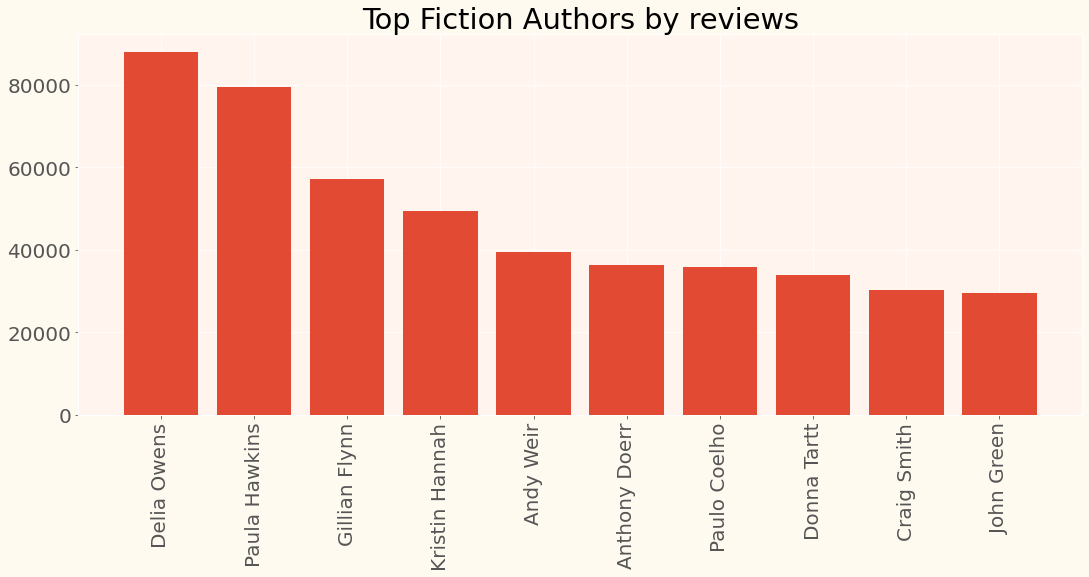

In [230]:
fig, ax = plt.subplots()

ax.bar(fiction_books['author'],fiction_books['reviews'] )

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(18)    
fig.set_figheight(7)
plt.xticks(rotation=90)
plt.title('Top Fiction Authors by reviews')
# строим диаграмму самых частооцениваемых книг по жанру

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

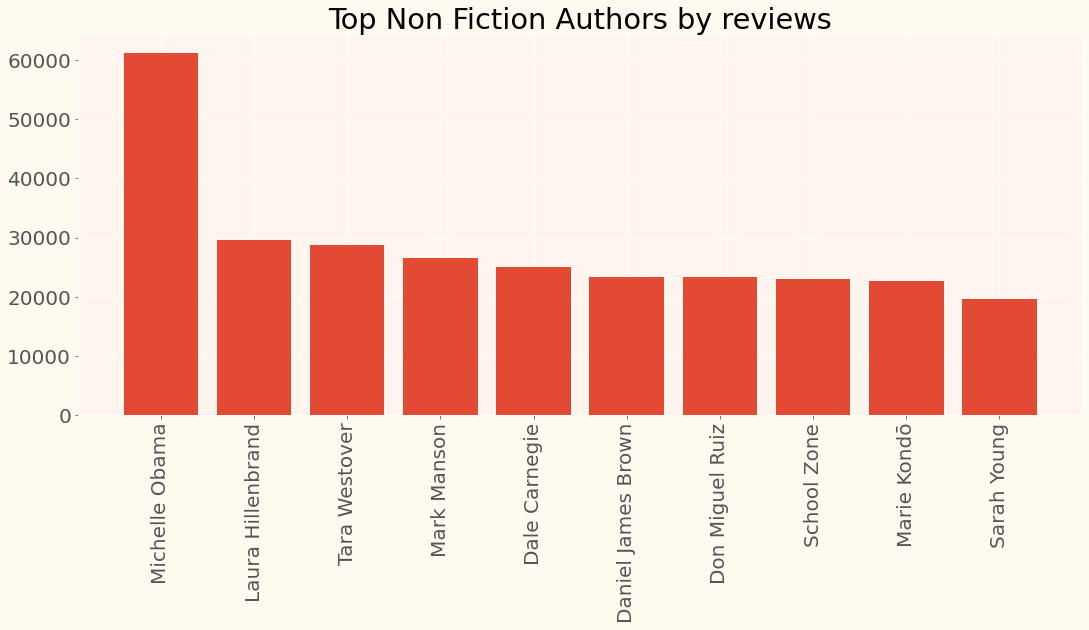

In [231]:
fig, ax = plt.subplots()

ax.bar(non_fiction_books['author'],non_fiction_books['reviews'] )

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(18)    
fig.set_figheight(7) 
plt.title('Top Non Fiction Authors by reviews')
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=90)

In [226]:
fiction_prices = df[df.isin(['Fiction']).any(axis= 1 )]
non_fiction_prices = df[df.isin(['Non Fiction']).any(axis= 1 )]
fiction_prices
# создаем датафрейм для постронеия распределения цен

,name,author,user_rating,reviews,price,year,genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance With Dragons (A Song Of Ice And Fire),George R.R. Martin,4.4,12643,11,2011,Fiction
6,A Game Of Thrones / A Clash Of Kings / A Storm...,George R.R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman In Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
...,...,...,...,...,...,...,...
534,Where The Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
535,Where The Wild Things Are,Maurice Sendak,4.8,9967,13,2009,Fiction
538,Winter Of The World: Book Two Of The Century T...,Ken Follett,4.5,10760,15,2012,Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

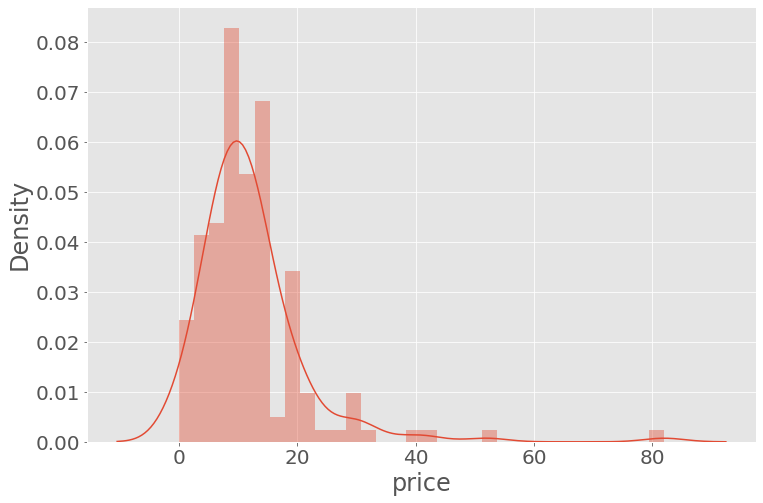

In [224]:
sns.distplot(fiction_prices["price"])
# строим распределение цен по жанрам

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

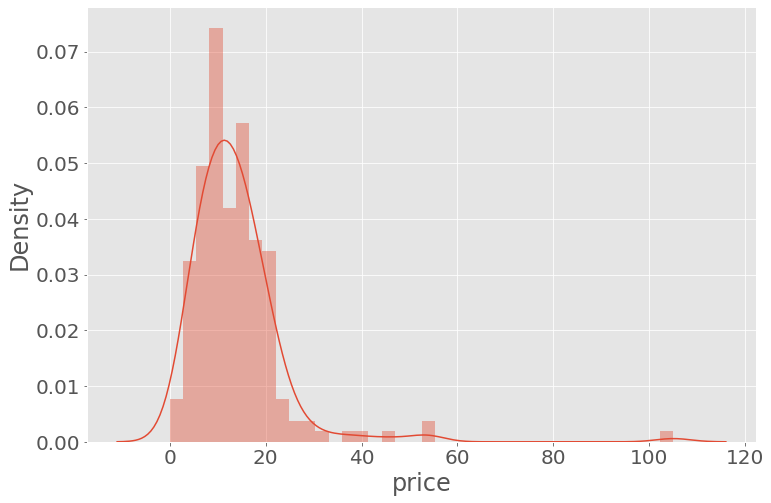

In [227]:
sns.distplot(non_fiction_prices["price"])